2 Objects Found


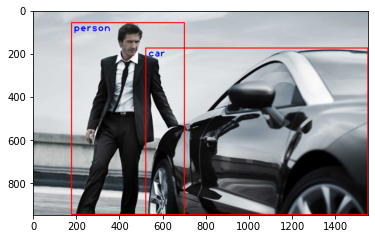

In [3]:
#Import Library
import cv2
import matplotlib.pyplot as plt

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

classLabels = [] #Empty List of Python
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())
    
#print(classLabels)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) ##mobilenet => [-1,1]
model.setInputSwapRB(True)

#read an image
img = cv2.imread('image.png')

#plt.imshow(img) #BGR

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #RGB

ClassIndex, confidece, bbox = model.detect(img, confThreshold = 0.5)

#print("Class Index - ", ClassIndex)

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 0, 255), 3)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (255, 0, 0), thickness = 3)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#Print Object Count
length = len(ClassIndex)
print(length, "Objects Found")